# Monty Hall simulation

In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


### Some preparations first

In [3]:
# theree doors, price is behind third door
doors = [0,0,1]
        
def arrange_price(doors: list) -> np.array:
    """
    Make random shuffle of the doors
    """
    return np.random.permutation(doors)

def initial_choice() -> int:
    """
    Make our first guess, at this point, your chances are even,
    so let's just choose randomly
    """
    return numpy.random.randint(3)

def monty_hall_choice(doors: list, initial_choice: int) -> int:
    """
    Host opens one of the remain doors, 
    he knows that there is no price behind it
    """
    for number, door in enumerate(doors):
        if door != 1 and number != initial_choice:
            return number

def make_final_choice(initial_choice: int,
                      monty_choice: int,
                      keep_answer: bool = True) -> int:
    """
    Depending on a bool parameter keep_answer you can change your choice
    or keep it same as initial
    """
    if keep_answer:
        return initial_choice
    else:
        for i in range(3):
            if i!= initial_choice and i!= monty_choice:
                return i
            
def check_price(final_choice: int, doors: list) -> bool:
    """
    Check if you win or not
    """
    if doors[final_choice] == 1:
        return 1,0
    else:
        return 0,1
    
def experiment(number_of_experimens: int, keep_initial_answer:bool = False) -> Tuple[int, int]:
    #initiate countes
    wins , losses = 0, 0
    # run experiments
    for experiment in range(number_of_experimens):
        doors = arrange_price(doors)
        choice_1 = initial_choice()
        choice_mh = monty_hall_choice(doors, choice_1)
        choice_final = make_final_choice(choice_1, choice_mh, keep_answer=keep_initial_answer)
        win, lose = check_price(choice_final, doors)
        wins+= win
        losses += lose
    return wins, losses
    

# Let's run our simulation!

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <a list of 9 Text yticklabel objects>)

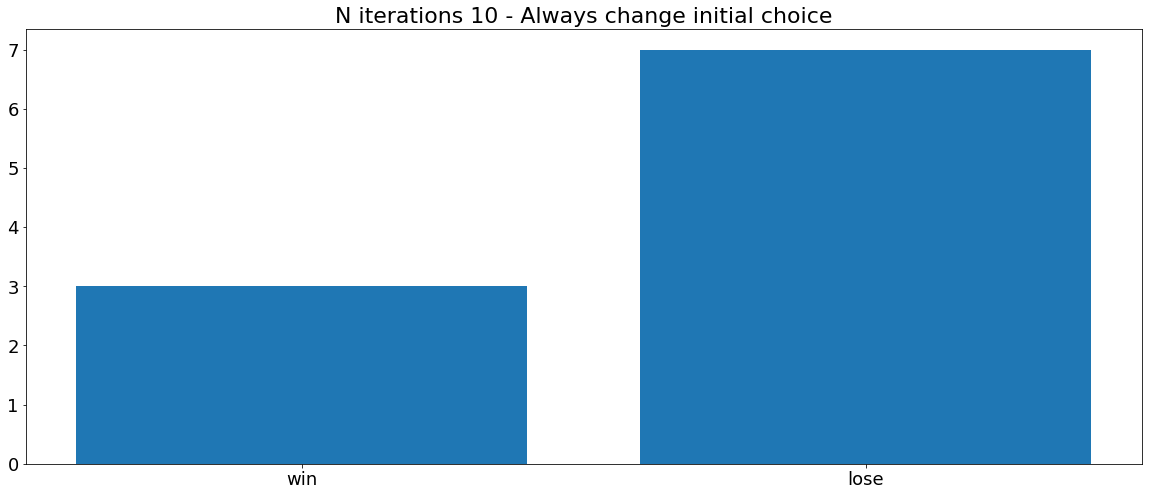

In [8]:


keep_initial_answer = False

number_of_experimens = 10

    
pylab.figure(figsize = (20,8))
pylab.bar(['win', 'lose'], [wins, losses])
pylab.title(f'N iterations {number_of_experimens} - Always change initial choice', size = 22)
pylab.xticks(['win', 'lose'], size = 18)
pylab.yticks(size = 18)

# Check your results

In [9]:
print(f'Win - Lose ratio {wins/(wins+losses)}')

Win - Lose ratio 0.3
